##1- Importando o arquivo e as bibliotecas que serão usadas


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cap 01 PBL - vendas.csv to Cap 01 PBL - vendas.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from datetime import datetime

##2- Tratando a base

In [ ]:
df = pd.read_csv('Cap 01 PBL - vendas.csv')

In [ ]:
#Verificando a existência de valores nulos e linhas duplicadas, respectivamente
print(df.info())
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Sequência               115 non-null    int64 
 1   Valor                   115 non-null    object
 2   Idade do cliente        115 non-null    int64 
 3   Localização do cliente  115 non-null    object
 4   Sexo do cliente         115 non-null    object
 5   Data da compra          115 non-null    object
 6   Quantidade de produtos  115 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 6.4+ KB
None
0


##3- Iniciando a regressão linear multivariada

In [ ]:
#Removendo o $ da coluna de preço a partir da criação de uma nova coluna:
split_currency = df['Valor'].str.split('$', expand=True)

# Renomeando coluna nova
split_currency.columns = ['Moeda','Valor_float']

#Derrubando coluna 'Moeda'
df_drop = split_currency.drop(columns=['Moeda'])

# Concatenando a coluna nova 'Valor_float' com dataframe antigo
result_df = pd.concat([df, df_drop], axis=1)
result_df['Valor_float'] = result_df['Valor_float'].astype(float)

In [ ]:
#Criando variáveis dummy para 'Localizacao do cliente' e 'Sexo do cliente'
result_df = pd.get_dummies(result_df, columns=['Localização do cliente', 'Sexo do cliente'], drop_first=True)

In [ ]:
#Convertendo a coluna 'Data_da_compra' de string para datetime
result_df['Data da compra'] = pd.to_datetime(result_df['Data da compra'])

#Encontrando a data de referência
data_referencia = result_df['Data da compra'].min()

#Calculando o número de dias desde a data de referência para cada data na coluna 'Data_da_compra'
result_df['Dias desde referencia'] = (result_df['Data da compra'] - data_referencia).dt.days

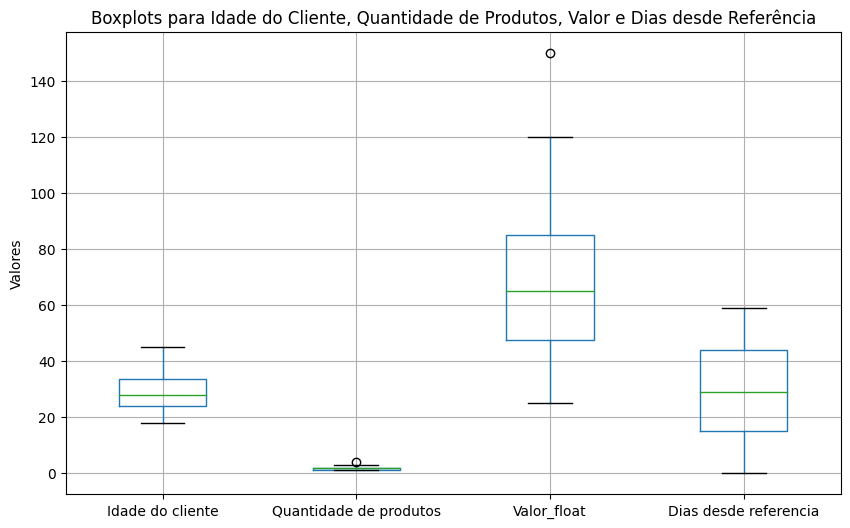

In [ ]:
#boxplot para avaliar outliers
colunas = ['Idade do cliente', 'Quantidade de produtos', 'Valor_float', 'Dias desde referencia']
plt.figure(figsize=(10, 6))
result_df[colunas].boxplot()
plt.title('Boxplots para Idade do Cliente, Quantidade de Produtos, Valor e Dias desde Referência')
plt.ylabel('Valores')
plt.show()

In [ ]:
#deixando apenas variaveis que queremos realmente usar no df
df_final = result_df.drop(columns=['Sequência', 'Valor', 'Data da compra'])
#iniciando avaliação de correlação
correlacao = df_final.corrwith(df_final['Valor_float'])
print(correlacao)

Idade do cliente                         0.364032
Quantidade de produtos                   0.180709
Valor_float                              1.000000
Localização do cliente_Belém            -0.082778
Localização do cliente_Brasília         -0.045805
Localização do cliente_Curitiba          0.099443
Localização do cliente_Florianópolis     0.008235
Localização do cliente_Fortaleza         0.043476
Localização do cliente_Goiânia          -0.036127
Localização do cliente_Manaus            0.029070
Localização do cliente_Porto Alegre      0.079188
Localização do cliente_Recife            0.046534
Localização do cliente_Rio de Janeiro   -0.143068
Localização do cliente_Salvador         -0.014048
Localização do cliente_São Paulo         0.056631
Sexo do cliente_M                       -0.155837
Dias desde referencia                   -0.059300
dtype: float64


In [ ]:
#verificando se há algo de estranho na distribuicao das variaveis
df_final.describe()

,Idade do cliente,Quantidade de produtos,Valor_float,Localização do cliente_Belém,Localização do cliente_Brasília,Localização do cliente_Curitiba,Localização do cliente_Florianópolis,Localização do cliente_Fortaleza,Localização do cliente_Goiânia,Localização do cliente_Manaus,Localização do cliente_Porto Alegre,Localização do cliente_Recife,Localização do cliente_Rio de Janeiro,Localização do cliente_Salvador,Localização do cliente_São Paulo,Sexo do cliente_M,Dias desde referencia
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,28.913043,1.756522,67.608696,0.069565,0.078261,0.069565,0.008696,0.078261,0.043478,0.060870,0.078261,0.113043,0.086957,0.113043,0.113043,0.478261,29.452174
std,6.365429,0.822825,27.316757,0.255526,0.269757,0.255526,0.093250,0.269757,0.204824,0.240137,0.269757,0.318032,0.283004,0.318032,0.318032,0.501713,17.115318
min,18.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,1.000000,47.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
50%,28.000000,2.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
75%,33.500000,2.000000,85.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,44.000000
max,45.000000,4.000000,150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,59.000000


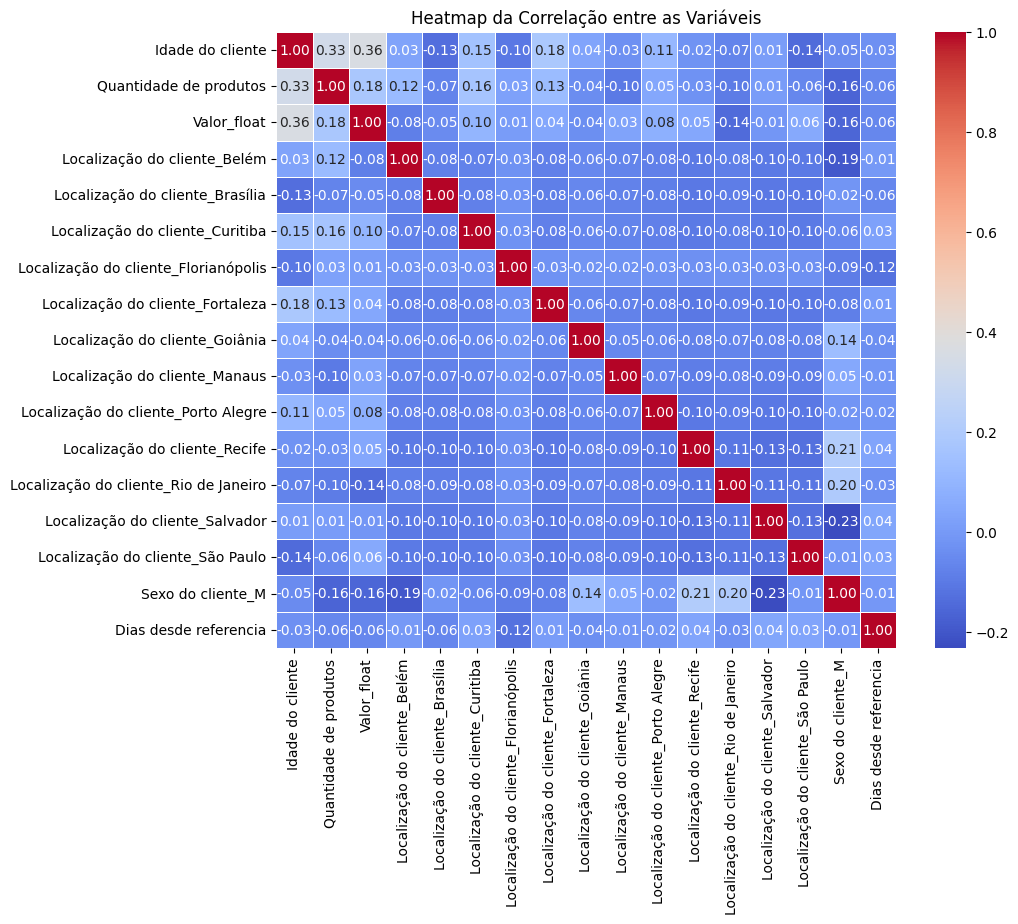

In [ ]:
correlacao = df_final.corr()

# o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap da Correlação entre as Variáveis')
plt.show()

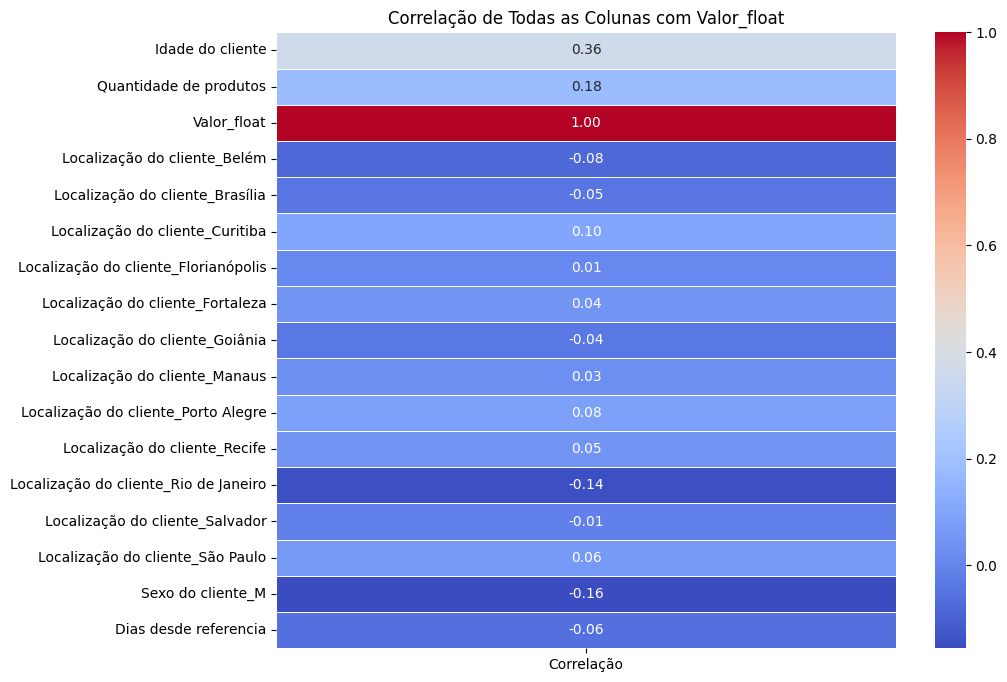

In [ ]:
correlacao_com_valor_float = df_final.corrwith(df_final['Valor_float'])
correlacao_df = pd.DataFrame(correlacao_com_valor_float, columns=['Correlação'])

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlação de Todas as Colunas com Valor_float')
plt.show()


In [ ]:
#Crie um objeto de regressão linear e ajuste o modelo aos dados:
X = result_df[['Dias desde referencia', 'Quantidade de produtos', 'Idade do cliente', 'Localização do cliente_Florianópolis', 'Localização do cliente_Fortaleza', 'Localização do cliente_Brasília', 'Localização do cliente_Curitiba', 'Localização do cliente_Belém', 'Localização do cliente_Manaus', 'Localização do cliente_Goiânia', 'Localização do cliente_São Paulo', 'Localização do cliente_Salvador', 'Localização do cliente_Rio de Janeiro', 'Localização do cliente_Porto Alegre', 'Localização do cliente_Recife', 'Sexo do cliente_M']]
y = result_df['Valor_float']
modelo = LinearRegression()
modelo.fit(X, y)
# Coeficientes da regressão:
coeficientes = modelo.coef_
intercepto = modelo.intercept_
# Fazer previsões:
previsoes = modelo.predict(X)
#Avaliando o desempenho do seu modelo, coeficiente de determinação (R²) e erro quadrático médio (MSE):
r2 = r2_score(y, previsoes)
mse = mean_squared_error(y, previsoes)
rmse = np.sqrt(mse)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y, previsoes)


print(f"Coeficiente de Determinação (R²): {r2}")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Erro Quadrático Médio (RMSE): {rmse}")
print(f"Erro Percentual Absoluto Médio (MAPE): {mape:.2f}%")

Coeficiente de Determinação (R²): 0.20516274928604006
Erro Quadrático Médio (MSE): 587.9541863457082
Erro Quadrático Médio (RMSE): 24.247766625932957
Erro Percentual Absoluto Médio (MAPE): 32.96%


In [ ]:
#Crie um objeto de regressão linear e ajuste o modelo aos dados:
X = result_df[['Dias desde referencia', 'Quantidade de produtos', 'Idade do cliente', 'Sexo do cliente_M']]
y = result_df['Valor_float']
modelo = LinearRegression()
modelo.fit(X, y)
# Coeficientes da regressão:
coeficientes = modelo.coef_
intercepto = modelo.intercept_
# Fazer previsões:
previsoes = modelo.predict(X)
#Avaliando o desempenho do seu modelo, coeficiente de determinação (R²) e erro quadrático médio (MSE):
r2 = r2_score(y, previsoes)
mse = mean_squared_error(y, previsoes)
rmse = np.sqrt(mse)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y, previsoes)


print(f"Coeficiente de Determinação (R²): {r2}")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Erro Quadrático Médio (RMSE): {rmse}")
print(f"Erro Percentual Absoluto Médio (MAPE): {mape:.2f}%")

Coeficiente de Determinação (R²): 0.15595608876707967
Erro Quadrático Médio (MSE): 624.3531623904613
Erro Quadrático Médio (RMSE): 24.98705989888489
Erro Percentual Absoluto Médio (MAPE): 34.80%


In [ ]:
#Crie um objeto de regressão linear e ajuste o modelo aos dados:
X = result_df[['Quantidade de produtos', 'Idade do cliente', 'Sexo do cliente_M', 'Localização do cliente_Curitiba','Localização do cliente_Rio de Janeiro']]
y = result_df['Valor_float']
modelo = LinearRegression()
modelo.fit(X, y)
# Coeficientes da regressão:
coeficientes = modelo.coef_
intercepto = modelo.intercept_
# Fazer previsões:
previsoes = modelo.predict(X)
#Avaliando o desempenho do seu modelo, coeficiente de determinação (R²) e erro quadrático médio (MSE):
r2 = r2_score(y, previsoes)
mse = mean_squared_error(y, previsoes)
rmse = np.sqrt(mse)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y, previsoes)


print(f"Coeficiente de Determinação (R²): {r2}")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Erro Quadrático Médio (RMSE): {rmse}")
print(f"Erro Percentual Absoluto Médio (MAPE): {mape:.2f}%")

Coeficiente de Determinação (R²): 0.1626623004320361
Erro Quadrático Médio (MSE): 619.3924673306993
Erro Quadrático Médio (RMSE): 24.88759665638085
Erro Percentual Absoluto Médio (MAPE): 34.13%


In [ ]:
result_df.columns

Index(['Sequência', 'Valor', 'Idade do cliente', 'Data da compra',
       'Quantidade de produtos', 'Valor_float', 'Localização do cliente_Belém',
       'Localização do cliente_Brasília', 'Localização do cliente_Curitiba',
       'Localização do cliente_Florianópolis',
       'Localização do cliente_Fortaleza', 'Localização do cliente_Goiânia',
       'Localização do cliente_Manaus', 'Localização do cliente_Porto Alegre',
       'Localização do cliente_Recife',
       'Localização do cliente_Rio de Janeiro',
       'Localização do cliente_Salvador', 'Localização do cliente_São Paulo',
       'Sexo do cliente_M', 'Dias desde referencia'],
      dtype='object')

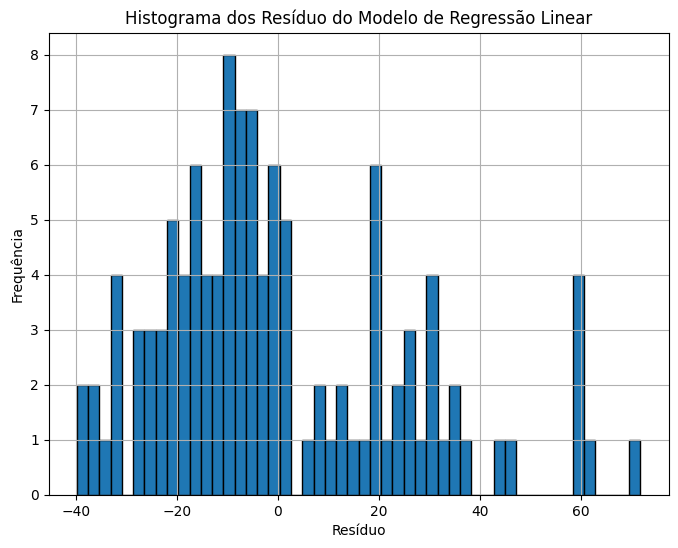

In [ ]:
# Calcular os valores residuais
residuos = y - previsoes

# Criar o histograma
plt.figure(figsize=(8, 6))
plt.hist(residuos, bins=50, edgecolor='black')
plt.title('Histograma dos Resíduo do Modelo de Regressão Linear')
plt.xlabel('Resíduo')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

##4- Conclusão da regressão linear multivariada:

Após o teste de uma série de combinações das variáveis disponibilizadas para tentar prever o valor da venda, percebe-se que mesmo no melhor dos casos, as informações disponibilizadas não são capazes de dar uma estimativa que se aproxime do real valor de venda.
Ao analisar as métricas de avaliação desse modelo criado pelo grupo, a partir do coeficiente de determinação, vemos que apenas 20% da variação dos dados pode ser explicada pelo modelo. E ao analisar o RMSE, é possível ver que, em média, os valores de venda previstos pelo modelo estão desviando aproximadamente 24 reais do valor de venda real.
Ainda usando o MAPE, podemos inferir que, em média, as previsões do modelo desviam cerca de 32.96% dos valores reais.
Com isso, cabe dizer que o modelo é pouco capaz de explicar a variabilidade da variável valor de venda.
Analisando também o histograma dos resíduos, seu formato indica que o modelo comete erros aleatórios e não prevê sistematicamente para mais ou para menos nenhum intervalo de valores de destino.